# Multidimensional Scaling

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plotting style
%matplotlib inline
plt.style.use('seaborn')
#plt.rcParams['figure.facecolor'] = 'white'
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [2]:
N = 100 # number of data points
u = 3 + np.random.randn(N) # first feature dimension with mean = 3
v = 7 + np.random.randn(N) # second feature dimensions with mean = 7
X = np.hstack((u.reshape(-1,1),v.reshape(-1,1))) # 100 x 2 data matrix

In [3]:
# view first 5 rows and the column means
print(X[:5,:])

[[1.92439885 6.90972274]
 [3.33232159 7.97506573]
 [2.69688112 6.49281584]
 [2.81367593 7.99563943]
 [2.32805578 7.45262741]]


In [4]:
print('Column 1 mean: ', np.mean(X[:, 0]))
print('Column 2 mean: ', np.mean(X[:, 1]))

Column 1 mean:  2.97338611038398
Column 2 mean:  7.03294251206911


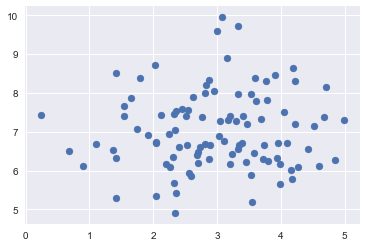

In [5]:
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.jet)
plt.show();

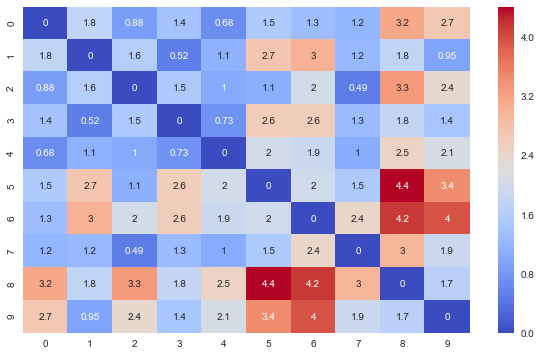

In [6]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
plt.figure(figsize=(10,6))
sns.heatmap(D[:10, :10], cmap="coolwarm", annot=True);

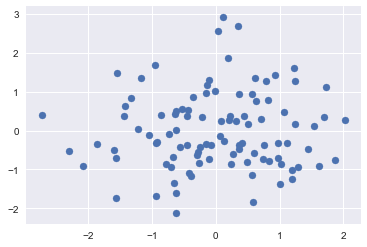

In [7]:
# function to form centering matrix
centering_matrix = lambda n: np.identity(n) -(1/n)*np.ones((n,n))
# multiply by data matrix X
X_centered = np.dot(centering_matrix(100), X)
# plot the centered data:
plt.scatter(X_centered[:, 0], X_centered[:, 1], cmap=plt.cm.jet)
plt.show();

In [8]:
# verify that the pairwise distances are unchanged
D_centered = pairwise_distances(X_centered)
np.allclose(D, D_centered)

True

## Classical MDS with Handwritten Digits

C:\Users\GAO\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\GAO\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)

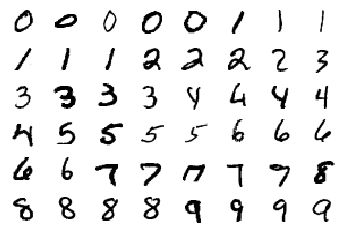

In [9]:
# import digits data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist['data']
y = mnist['target']
mnist.data.shape

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r');

In [10]:
def ClassicalMDS(dist_matrix, k):
    """Performs Classical Multidimensional Scaling
    Parameters
    ----------
    dist_matrix : Pairwise dissimilarity/distance matrix (n x n)
    k: Dimension of the output configuration
    
    Returns
    -------
    X : Matrix with columns as the output configuration vectors (k x n)
    """
    # get shape of distance matrix                                                                         
    n = dist_matrix.shape[0]
    
    # check distance matrix is symmetric
    if not np.allclose(np.transpose(dist_matrix),dist_matrix):
        print('Distance matrix must be symmetric')
        return
 
    # centering matrix
    C = np.identity(n) -(1/n)*np.ones((n,n))
 
    # compute gram matrix                                                                                    
    B = -(1/2)*C.dot(dist_matrix**2).dot(C)
 
    # solve for eigenvectors and eigenvalues and sort descending                                                   
    w, v = np.linalg.eigh(B)                                                  
    idx   = np.argsort(w)[::-1]
    eigvals = w[idx]
    eigvecs = v[:,idx]
     
    # select k largest eigenvalues and eigenvectors                      
    Lambda  = np.diag(np.sqrt(eigvals[:k]))
    V  = eigvecs[:,:k]
    X  = np.dot(Lambda, np.transpose(V))
    X = np.transpose(X)

    return X

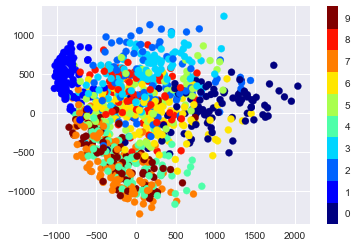

In [11]:
# get a subset of the mnist dataset
sample = np.random.permutation(mnist.data.shape[0])[:1000]
data = mnist.data[sample]
labels = mnist.target[sample]

# compute pairwise distance matrix with sklearn
D = pairwise_distances(data)

# plot results of MDS
X = ClassicalMDS(pairwise_distances(data), 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

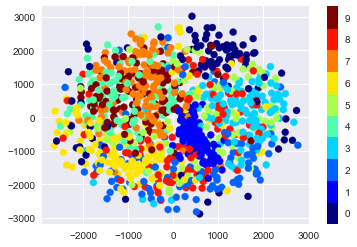

In [12]:
from sklearn.manifold import MDS

model = MDS(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

In [13]:
murder = np.array([1.00, 0.52, 0.34, 0.81, 0.28, 0.06, 0.11])
rape = np.array([0.52, 1.00, 0.55, 0.70, 0.68, 0.60, 0.44])
robbery = np.array([0.34, 0.55, 1.00, 0.56, 0.62, 0.44, 0.62])
assault = np.array([0.81, 0.70, 0.56, 1.00, 0.52, 0.32, 0.33])
burglary = np.array([0.28, 0.68, 0.62, 0.52, 1.00, 0.80, 0.70])
larceny = np.array([0.06, 0.60, 0.44, 0.32, 0.80, 1.00, 0.55])
auto_theft = np.array([0.11, 0.44, 0.62, 0.33, 0.70, 0.55, 1.00])

crime_matrix = np.array([murder, rape, robbery, assault, burglary, larceny, auto_theft])
crime_matrix
crime_matrix.shape

array([[1.  , 0.52, 0.34, 0.81, 0.28, 0.06, 0.11],
       [0.52, 1.  , 0.55, 0.7 , 0.68, 0.6 , 0.44],
       [0.34, 0.55, 1.  , 0.56, 0.62, 0.44, 0.62],
       [0.81, 0.7 , 0.56, 1.  , 0.52, 0.32, 0.33],
       [0.28, 0.68, 0.62, 0.52, 1.  , 0.8 , 0.7 ],
       [0.06, 0.6 , 0.44, 0.32, 0.8 , 1.  , 0.55],
       [0.11, 0.44, 0.62, 0.33, 0.7 , 0.55, 1.  ]])

(7, 7)

array([[-0.79745602, -0.61060277],
       [-0.26242261,  0.29569887],
       [ 0.1867529 , -0.29584503],
       [-0.63148091, -0.10295661],
       [ 0.26432209,  0.37745123],
       [ 0.57597632,  0.46180055],
       [ 0.66430823, -0.12554625]])

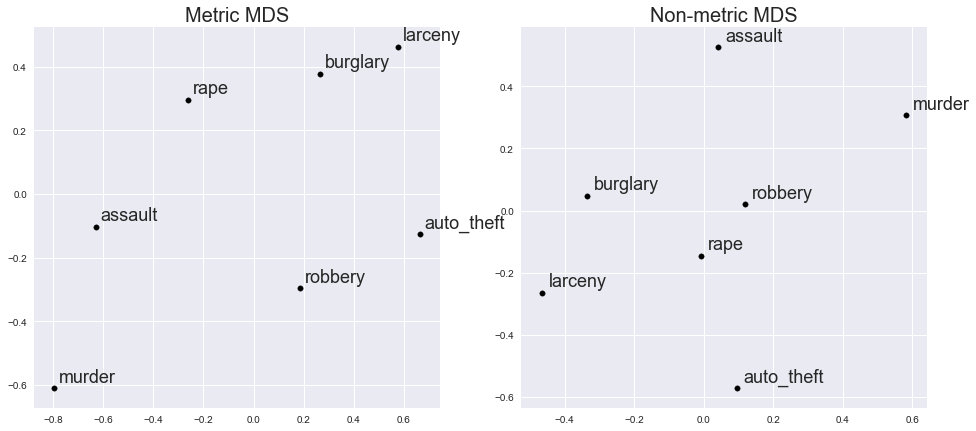

In [14]:
# set random seed
np.random.seed(0)
plt.style.use('seaborn')
# metric MDS
model = MDS(n_components=2)
X = model.fit_transform(crime_matrix)
X
labels = ['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto_theft']
# plot results
_ = plt.figure(figsize=(16,7))
_ = plt.subplot(1,2,1)
_ = plt.scatter(X[:, 0], X[:, 1], c='black', s=30)
_ = plt.title('Metric MDS', size=20)
for i in range(len(labels)):
    _ = plt.text(X[i][0]+0.02, X[i][1]+0.02, s=labels[i], size=18)

# non-metric MDS
_ = plt.subplot(1,2,2)
model = MDS(n_components=2, metric=False)
proj = model.fit_transform(crime_matrix)
labels = ['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto_theft']
# plot results
_ = plt.scatter(proj[:, 0], proj[:, 1], c='black', s=30)
_ = plt.title('Non-metric MDS', size=20)
for i in range(len(labels)):
    _ = plt.text(proj[i][0]+0.02, proj[i][1]+0.02, s=labels[i], size=18)

In [18]:
import pandas as pd
eurodist = pd.read_csv('C:/Users/GAO/Jupyter/data/eurodist.csv')
eurodist.head()
labels = list(eurodist.columns[1:])

,city,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
0,Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
1,Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
2,Brussels,2963,1318,0,204,583,206,966,677,2256,...,2084,690,1558,1011,925,747,285,1511,1616,1175
3,Calais,3175,1326,204,0,460,409,1136,747,2224,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
4,Cherbourg,3339,1294,583,460,0,785,1545,853,2047,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588


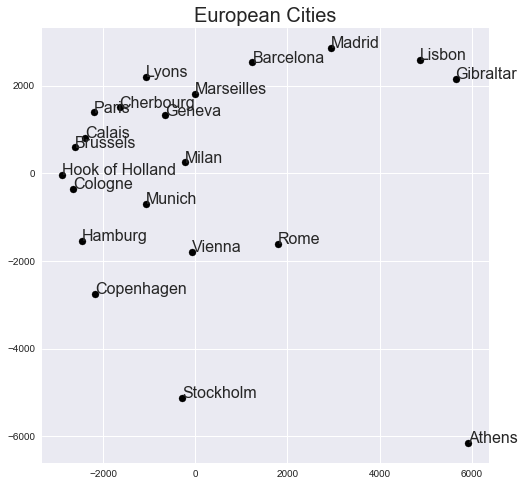

In [23]:
np.random.seed(0)
euro_cities = np.array(eurodist.T[1:].T)
model = MDS(n_components=2)
X = model.fit_transform(euro_cities)
# plot results
_ = plt.figure(figsize=(8,8))
_ = plt.scatter(X[:, 0], X[:, 1], c='black')
_ = plt.title('European Cities', size=20)
for i in range(len(labels)):
    _ = plt.text(X[i][0]+0.02, X[i][1]+0.02, s=labels[i], size=16)